# Round 2

For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
7. BONUS: Put all the previously mentioned data transformations into a function.

In [66]:
import pandas as pd
import numpy as np

In [67]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [68]:
data.shape

(10910, 26)

In [69]:
#standarize header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

print(data.columns)

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')


In [70]:
data.select_dtypes(np.number)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [71]:
data.select_dtypes(object)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [72]:
data.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [73]:
data['vehicle_type']=data['vehicle_type'].fillna('M')
data['vehicle_type'].value_counts(dropna=False)
#I decided to fill this because I thought that A signifies Automatic, then NaN should be Manual or 'M'
data


,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [74]:
data=data.drop(columns=['unnamed:_0'])  
data=data.dropna()   # drop rows with nan values
data.isna().sum()


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [76]:
#Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

data['month'] = pd.DatetimeIndex(data['effective_to_date']).month
data=data[(data['month'] <= 2)]
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


### bonus

In [77]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [78]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0','vehicle_type'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['month'] = df['effective_to_date'].dt.month
    return df

#Clean all the data in 1 function

In [79]:
data_clean = clean_data(data)
data_clean

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


# Round3

1.Show DataFrame info.
2.Describe DataFrame.
3.Show a plot of the total number of responses.
4.Show a plot of the response rate by the sales channel.
5.Show a plot of the response rate by the total claim amount.
6.Show a plot of the response rate by income.

In [80]:
df = pd.DataFrame(data)
print (df.dtypes)

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [81]:
data.describe().round(2)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.00,10910.00,10910.00,10910.00,10277.00,10910.00,10277.00,10910.00,10910.00
mean,5454.50,8018.24,37536.28,93.20,15.15,48.09,0.38,2.98,434.89
std,3149.59,6885.08,30359.20,34.44,10.08,27.94,0.91,2.40,292.18
min,0.00,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,2727.25,4014.45,0.00,68.00,6.00,24.00,0.00,1.00,271.08
50%,5454.50,5771.15,33813.50,83.00,14.00,48.00,0.00,2.00,382.56
75%,8181.75,8992.78,62250.75,109.00,23.00,71.00,0.00,4.00,547.20
max,10909.00,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [84]:
data['response'].value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

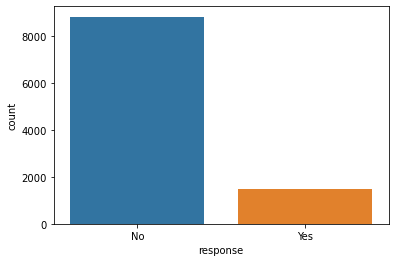

In [85]:
sns.countplot(x='response', data=data)
plt.show()

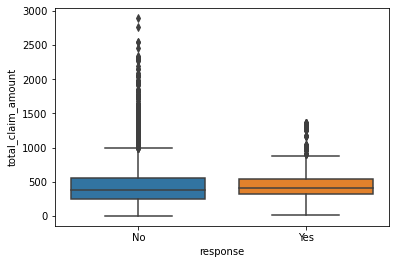

In [87]:
sns.boxplot (x='response', y='total_claim_amount', data=data)
plt.show()

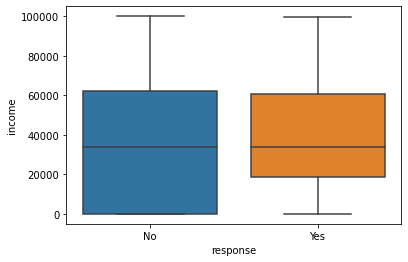

In [88]:
sns.boxplot (x='response', y='income', data=data)
plt.show()

# Round 4

Complete the following task

-Check the data types of the columns.
-Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively) (Make new dataframe)


Now we will try to check the normality of the numerical variables visually

    Use seaborn library to construct distribution plots for the numerical variables
    Use Matplotlib to construct histograms
    Do the distributions for different numerical variables look like a normal distribution 


For the numerical variables, check the multicollinearity between the features.(heatmap) 
    
    Please note that we will use the column total_claim_amount later as the target variable.

Drop one of the two features that show a high correlation between them (greater than 0.9). above .9 drop
Write code for both the correlation matrix and for seaborn heatmap.
If there is no pair of features that have a high correlation, then do not drop any features


In [89]:
#Check the data types of the columns
data.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [90]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.
numericals = data.select_dtypes(include = np.number)
categoricals = data.select_dtypes(include = object)
display(numericals)
display(categoricals)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


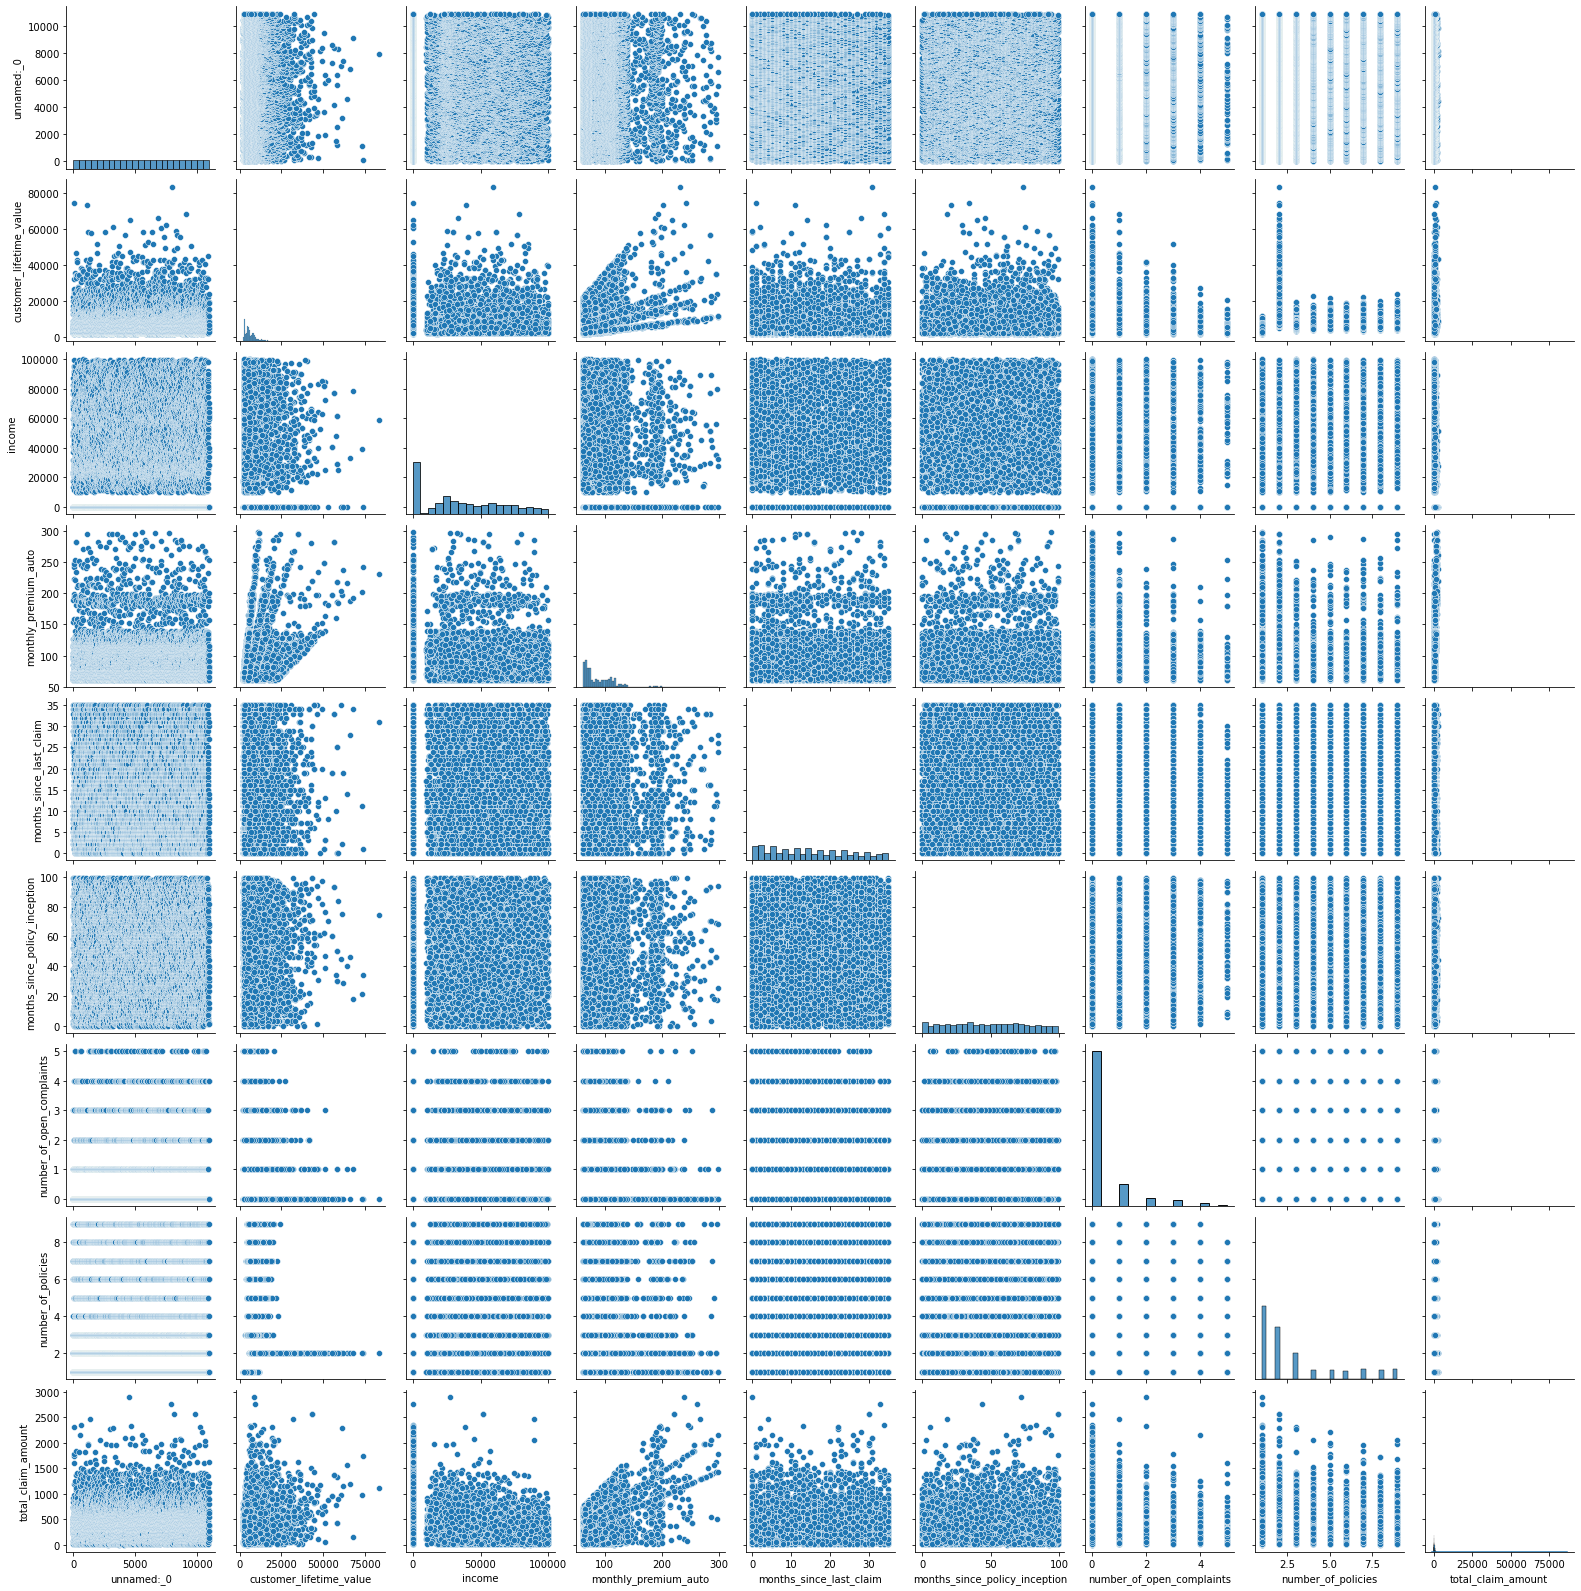

In [91]:
# Now we will try to check the normality of the numerical variables visually
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.pairplot(data)

sns.distplot(data['customer_lifetime_value'], bins=20)
plt.show()

In [92]:
numericals.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,10910.0,5454.50,3149.59,0.00,2727.25,5454.50,8181.75,10909.00
customer_lifetime_value,10910.0,8018.24,6885.08,1898.01,4014.45,5771.15,8992.78,83325.38
income,10910.0,37536.28,30359.20,0.00,0.00,33813.50,62250.75,99981.00
monthly_premium_auto,10910.0,93.20,34.44,61.00,68.00,83.00,109.00,298.00
months_since_last_claim,10277.0,15.15,10.08,0.00,6.00,14.00,23.00,35.00
months_since_policy_inception,10910.0,48.09,27.94,0.00,24.00,48.00,71.00,99.00
number_of_open_complaints,10277.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
number_of_policies,10910.0,2.98,2.40,1.00,1.00,2.00,4.00,9.00
total_claim_amount,10910.0,434.89,292.18,0.10,271.08,382.56,547.20,2893.24


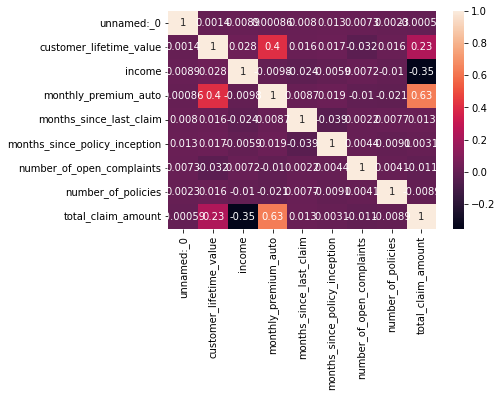

In [93]:
#heatmap
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [94]:
correlations_matrix
#to  see the correlations clearly

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.007958,0.012795,0.007325,0.002319,-0.000593
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months_since_last_claim,0.007958,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number_of_open_complaints,0.007325,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


In [ ]:
#decided not to drop anythinng because there were no correlations above 0.9
#normalization is not neede for linear regression

# Round5

Get data r2
Explore r3
X-y split. x num, x cat ev but total claim amt y total claim amt
 new data frame X (features)
    total claim amt (target)
Normalize (numerical). / minmax/ scale x numerical



In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [96]:
#X-Y Split
X=data.drop('total_claim_amount', axis=1)
y=data.total_claim_amount


In [97]:
X=X.drop(columns=['customer', 'effective_to_date']) #useless columns

In [98]:
#numerical and categorical split

X_num=X._get_numeric_data()
X_cat=X.drop(columns=X_num.columns) 

In [99]:
X_num.shape

(10910, 8)

In [100]:
X_cat.shape

(10910, 15)

In [101]:
from sklearn.preprocessing import StandardScaler

X_scaled=StandardScaler().fit_transform(X_num)

def normalize(X):
    X_mean=X.mean(axis=0)
    X_std=X.std(axis=0)
    X_std[X_std==0]=1.0
    X=(X-X_mean)/X_std
    return X

X_num=normalize(X_num)
X_num.head()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-1.731813,-0.466084,0.345619,-0.934776,-0.808412,0.139870,-0.421122,2.509340
1,-1.731495,-0.840907,-1.236406,-0.847675,-1.205223,-0.790673,-0.421122,-0.824884
2,-1.731178,1.006477,-0.507170,0.197545,1.870067,-0.611722,-0.421122,-0.408106
3,-1.730860,2.079017,0.380172,0.110443,-0.510803,-1.613846,-0.421122,-0.408106
4,-1.730543,0.146233,-0.456576,0.691121,NaN,-0.611722,NaN,1.675784


# Round 6

One Hot/Label Encoding (categorical).

Concat DataFrames

Linear Regression
    Train-test split.
    Apply linear regression.

Model Validation
    Description:
        R2.
        MSE.
        RMSE.
        MAE.

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
X=data.drop('total_claim_amount', axis=1)
y=data.total_claim_amount

# we drop some useless columns
X=X.drop(columns=['customer', 'effective_to_date'])

In [104]:
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_cat).toarray(), columns=OneHotEncoder(drop='first').fit(X_cat).get_feature_names(input_features=X_cat.columns)).head()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,state_nan,response_Yes,response_nan,coverage_Extended,coverage_Premium,education_College,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_nan,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_nan,vehicle_type_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [105]:
#concat categorical and numerical
X_cat=pd.get_dummies(X_cat, drop_first=True)
X=pd.concat([X_num, X_cat], axis=1) 
X.head()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-1.731813,-0.466084,0.345619,-0.934776,-0.808412,0.139870,-0.421122,2.509340,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.731495,-0.840907,-1.236406,-0.847675,-1.205223,-0.790673,-0.421122,-0.824884,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.731178,1.006477,-0.507170,0.197545,1.870067,-0.611722,-0.421122,-0.408106,0,0,...,0,1,0,0,0,1,0,0,1,0
3,-1.730860,2.079017,0.380172,0.110443,-0.510803,-1.613846,-0.421122,-0.408106,0,0,...,1,0,0,0,0,0,0,0,1,0
4,-1.730543,0.146233,-0.456576,0.691121,NaN,-0.611722,NaN,1.675784,0,0,...,1,0,0,0,0,0,0,0,1,0


### Linear regresion

In [106]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X, y, test_size=.2)


In [112]:
print(X_train.shape)
X_train.dropna()
print(X_test.shape)
X_test.dropna()
print(y_train.shape)
y_train.dropna()
print(y_test.shape)
y_test.dropna()

(8728, 51)
(2182, 51)
(8728,)
(2182,)


6411      256.438030
4414      960.115399
5325       48.828732
10254    1396.702365
1558      266.949266
            ...     
8120      921.600000
3367      247.911872
3273      629.532731
3764      300.056383
1987      542.400000
Name: total_claim_amount, Length: 2182, dtype: float64

In [113]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg() 
linreg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [114]:
y_pred_linreg=linreg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [116]:
X_train

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
2750,-0.858683,-0.039843,1.957388,-0.847675,0.878038,1.822006,-0.421122,-0.408106,0,1,...,0,1,0,0,0,0,0,1,1,0
8432,0.945361,-0.785819,-1.236406,-0.673471,1.076444,-0.146451,0.674819,-0.824884,0,0,...,1,0,0,0,0,0,0,1,1,0
9198,1.188567,0.261186,-0.009232,-0.905742,-0.014788,-1.470685,-0.421122,-0.408106,0,1,...,1,0,0,0,0,0,0,0,0,0
1682,-1.197775,0.658584,-0.902174,-0.760573,-0.014788,0.139870,-0.421122,-0.408106,0,0,...,1,0,0,0,0,0,0,0,1,0
6712,0.399258,1.165835,-1.236406,-0.818641,-0.510803,-1.363315,-0.421122,-0.408106,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,-0.304325,-0.474038,-1.236406,1.242764,-1.006817,-0.074871,-0.421122,-0.824884,0,0,...,0,1,0,0,0,1,0,0,1,0
9650,1.332078,-0.237029,-0.454073,-0.325065,-1.106020,-1.399105,0.674819,1.675784,0,1,...,0,0,1,0,0,0,0,1,1,0
1051,-1.398118,-0.794349,0.508700,-0.847675,1.770864,1.607265,-0.421122,-0.824884,1,0,...,1,0,0,0,0,0,0,0,0,0
3050,-0.763433,0.143672,0.131845,0.662087,-0.411600,-0.468562,-0.421122,0.008672,0,0,...,0,0,1,0,0,0,0,0,1,0


In [117]:
y_train.round(2)

2750      81.38
8432     336.00
9198     128.97
1682     459.28
6712     163.05
          ...  
4496     652.80
9650     586.92
1051     191.95
3050     556.80
10450    246.70
Name: total_claim_amount, Length: 8728, dtype: float64

In [118]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

In [ ]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

# Round 7

In [ ]:
Try to improve the linear regression model.

In [ ]:
import pandas as pd

In [119]:
pd.read_csv('marketing_customer_analysis.csv')

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [120]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]
data=data.drop(columns=['unnamed:_0', 'vehicle_type'])
data=df.dropna()
data['effective_to_date']=pd.to_datetime(data['effective_to_date'], errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_15012\2479205870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['effective_to_date']=pd.to_datetime(data['effective_to_date'], errors='coerce')


In [121]:
#X-y
X=data.drop(columns=['customer', 'effective_to_date', 'total_claim_amount'], axis=1)
y=data.total_claim_amount

In [122]:
#numcat
X_num=X._get_numeric_data()
X_cat=X.drop(columns=X_num.columns)

In [125]:
#normalization
from sklearn.preprocessing import StandardScaler

X_scaled=StandardScaler().fit_transform(X_num)

def normalize(X):
    X_mean=X.mean(axis=0)
    X_std=X.std(axis=0)
    X_std[X_std==0]=1.0
    X=(X-X_mean)/X_std
    return X

X_num=normalize(X_num)
X_num.head()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
2,-1.758648,0.993487,-0.506125,0.177432,1.859453,-0.609440,-0.42566,-0.410059
3,-1.758331,2.054553,0.384202,0.091946,-0.503235,-1.604221,-0.42566,-0.410059
10,-1.756108,-0.413670,1.496393,0.946801,-0.207899,-0.609440,-0.42566,-0.828406
13,-1.755155,-0.370589,0.954509,-0.705919,0.973445,-0.822608,-0.42566,0.426634
16,-1.754203,-0.388968,1.297665,-0.791404,1.071890,-1.355526,-0.42566,1.263328


In [127]:
#onehot
X_cat=pd.get_dummies(X_cat, drop_first=True)

In [128]:
#concat transformations
X=pd.concat([X_num, X_cat], axis=1)

In [129]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.2)

In [130]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train) 

LinearRegression()

In [131]:
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 142.1051296923154 -- test RMSE: 137.95645177418973


# Final Round

Present results.

This has been an intense and challenging. I've learnt a lot and I got lost lots of time too. Firstly, I learnt how to use Jupyter notebook as it was my first time using this. I've learn how to push data into the lab, clean data and filter it. Though I still have to master the whole concept of processing of data because for me it was a very extensive matter that includes loads of data and procedure. I coludn't seem to cope up that much from the lessons from round 5 and further (information overload I guess), I think we need to have a quick recap of the week.